<a href="https://colab.research.google.com/github/styxx216/ML/blob/main/Vinho_Verde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import torch
from sklearn.metrics import mean_squared_error

In [22]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [23]:
white_wine_data_link = '/content/drive/MyDrive/Behbudiy Labs/Wine Quality Training.csv'
red_wine_data_link = '/content/drive/MyDrive/Behbudiy Labs/RedWIneTraining.csv'
#data_link = 'https://drive.google.com/file/d/1VZJPHECUTHOJdrU3G5mKXBu0hTwpi4rK'

In [24]:
df_white_wine = pd.read_csv(white_wine_data_link)
df_red_wine = pd.read_csv(red_wine_data_link)

In [25]:
df_white_wine['white'] = 1
df_white_wine['red'] = 0

df_red_wine['white'] = 0
df_red_wine['red'] = 1

df = pd.concat([df_white_wine, df_red_wine])

In [26]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white,red
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1,0
4,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,6.3,0.51,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0,1
1275,6.2,0.60,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0,1
1276,5.9,0.55,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0,1
1277,6.3,0.51,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0,1


some statistics

In [27]:
df.loc[df.quality==9]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white,red
617,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9,1,0
653,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9,1,0
658,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9,1,0
697,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9,1,0


In [28]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white,red
count,5197.000000,5197.000000,5197.00000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000
mean,7.213383,0.339538,0.31928,5.450914,0.056244,30.732538,115.877718,0.994689,3.217343,0.531318,10.494202,5.818164,0.753896,0.246104
std,1.298477,0.164690,0.14589,4.777082,0.035568,17.933371,56.301655,0.003019,0.159915,0.150708,1.194872,0.865377,0.430781,0.430781
min,3.800000,0.080000,0.00000,0.600000,0.009000,1.000000,6.000000,0.987130,2.720000,0.220000,8.000000,3.000000,0.000000,0.000000
25%,6.400000,0.230000,0.25000,1.800000,0.038000,17.000000,77.000000,0.992300,3.110000,0.430000,9.500000,5.000000,1.000000,0.000000
50%,7.000000,0.290000,0.31000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000,0.000000
75%,7.700000,0.400000,0.39000,8.200000,0.065000,41.000000,155.000000,0.997000,3.320000,0.600000,11.300000,6.000000,1.000000,0.000000
max,15.900000,1.580000,1.66000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000,1.000000


In [29]:
print(sorted(df['quality'].unique()))

[3, 4, 5, 6, 7, 8, 9]


<Axes: xlabel='quality'>

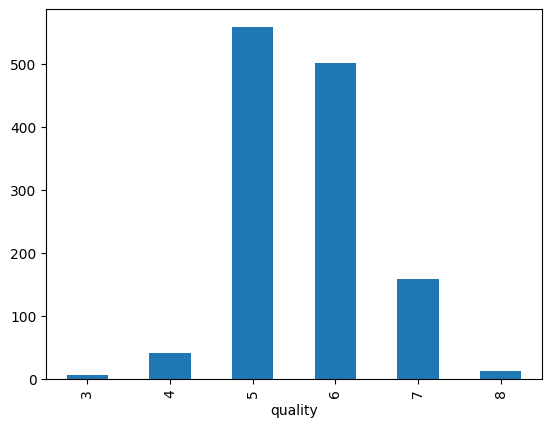

In [30]:
df.loc[df['red']==1].groupby(['quality'])['quality'].count().plot(kind="bar")

<Axes: xlabel='quality'>

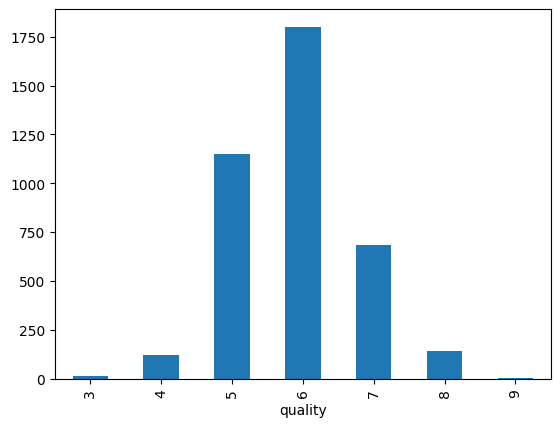

In [31]:
df.loc[df['white']==1].groupby(['quality'])['quality'].count().plot(kind="bar")

In [32]:
wine_tipe = 'white'

In [33]:
wine_tipe = 'white'
x = df.loc[df[wine_tipe]==1].groupby(['quality'])['quality'].count().values
y = sorted(df.loc[df[wine_tipe]==1]['quality'].unique())
print(y)
x = x/len(df.loc[df[wine_tipe]==1])*100
x_1 = list(x)
y_1 = list(map(str,y))

wine_tipe = 'red'
x = df.loc[df[wine_tipe]==1].groupby(['quality'])['quality'].count().values
y = sorted(df.loc[df[wine_tipe]==1]['quality'].unique())
x = x/len(df.loc[df[wine_tipe]==1])*100
x_2 = list(x)
x_2.append(0)

y_2 = list(map(str,y))
y_2.append(9)


[3, 4, 5, 6, 7, 8, 9]


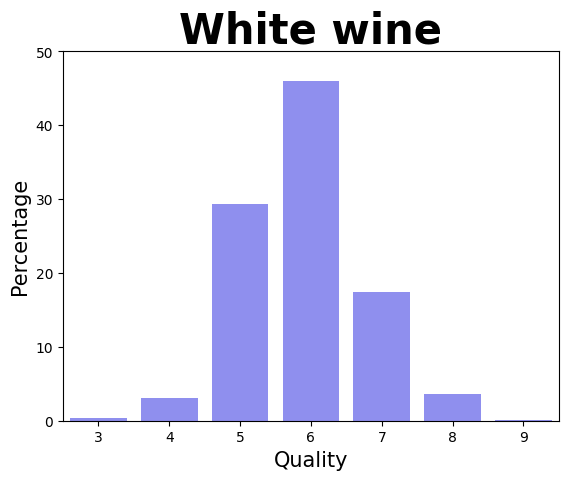

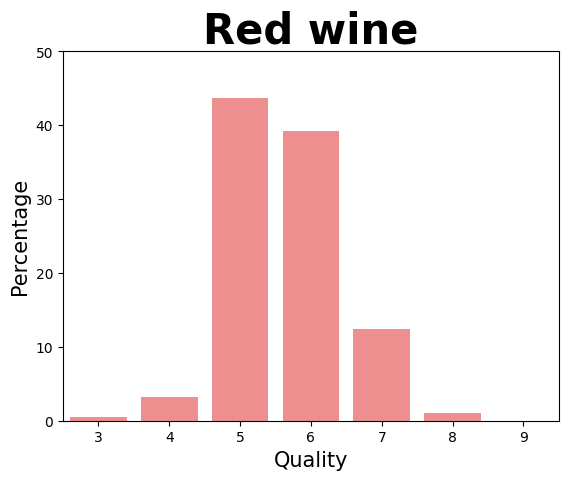

In [34]:
p = (sns.barplot(x = y_1,y = x_1, color='blue' ,alpha = 0.5))
p.set_title('White wine', fontdict={'size': 30, 'weight': 'bold'})
p.set_xlabel('Quality', fontdict={'size': 15})
p.set_ylabel('Percentage', fontdict={'size': 15})
p.set_ylim([0, 50])
plt.show()
p = (sns.barplot(x = y_2,y = x_2, color='red' ,alpha = 0.5))
p.set_title('Red wine', fontdict={'size': 30, 'weight': 'bold'})
p.set_xlabel('Quality', fontdict={'size': 15})
p.set_ylabel('Percentage', fontdict={'size': 15})
p.set_ylim([0, 50])
plt.show()

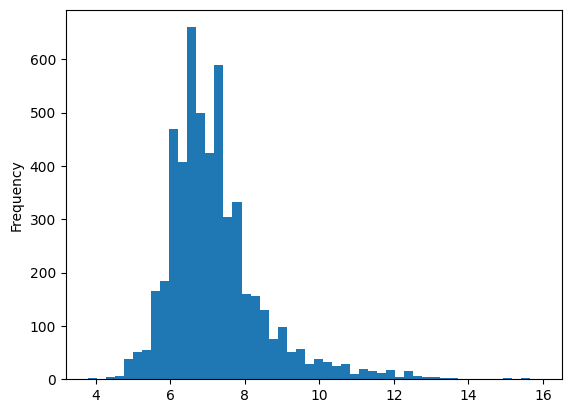

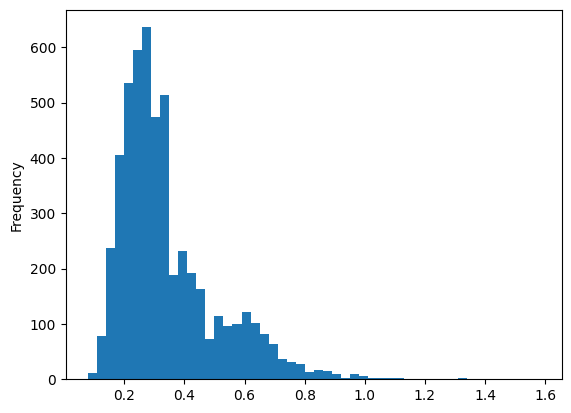

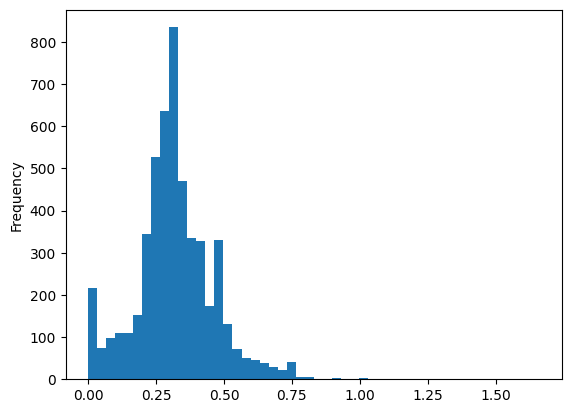

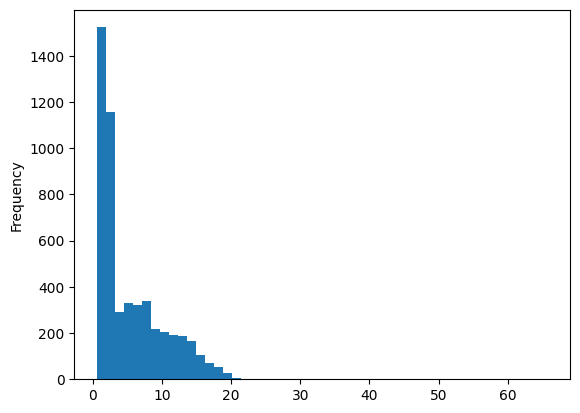

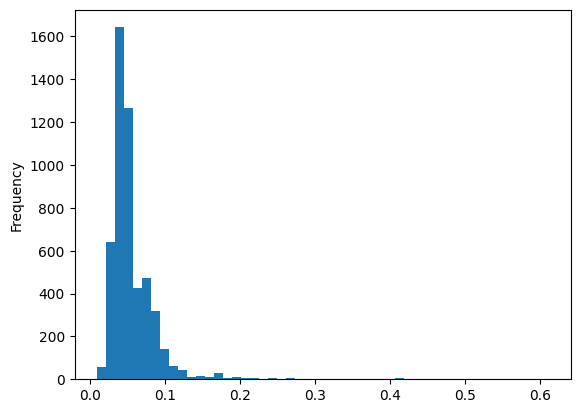

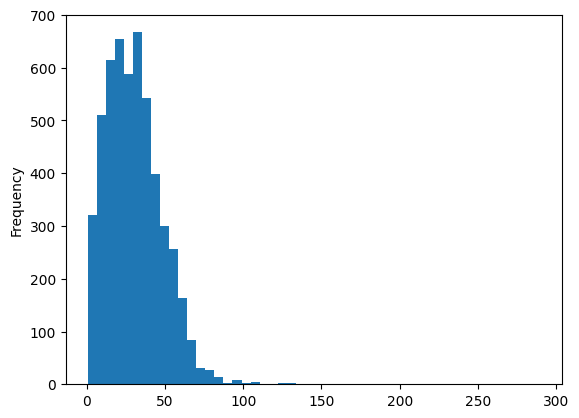

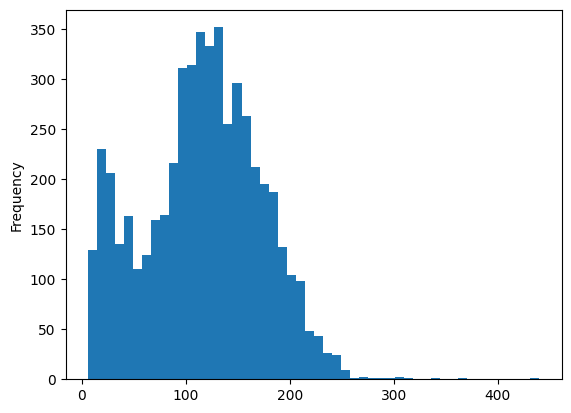

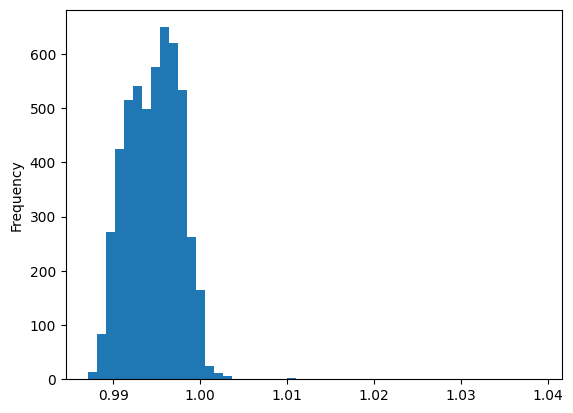

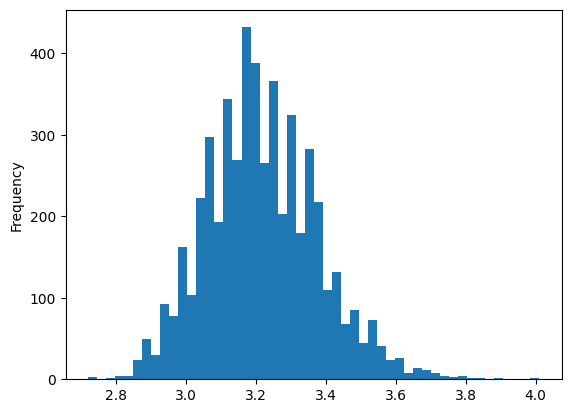

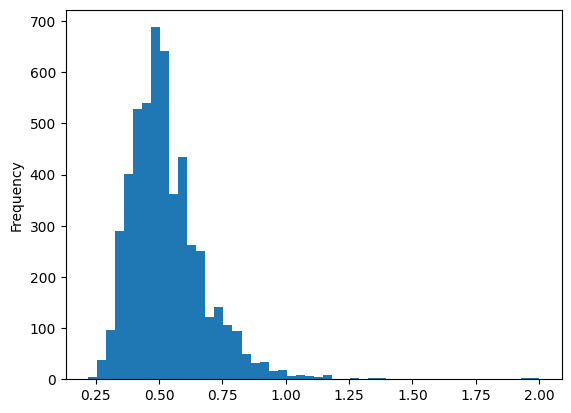

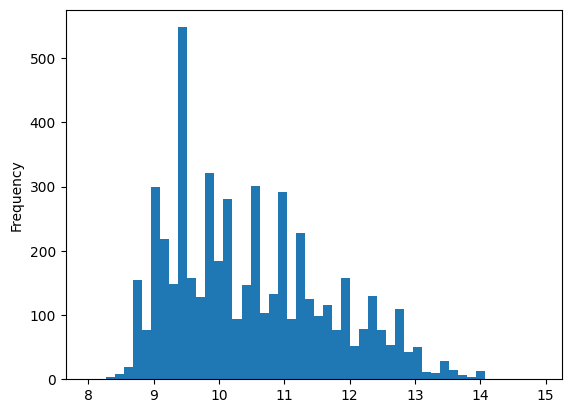

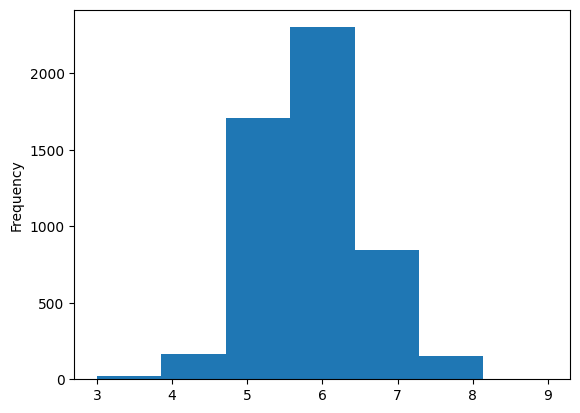

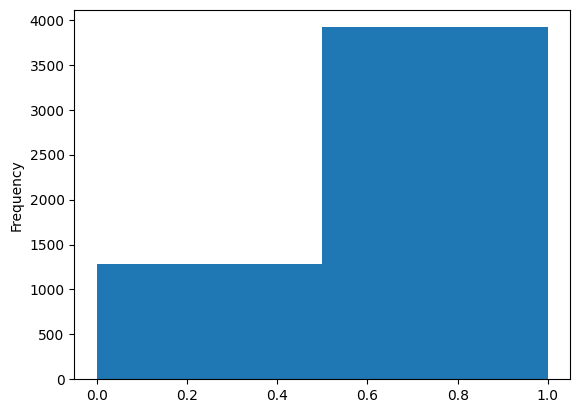

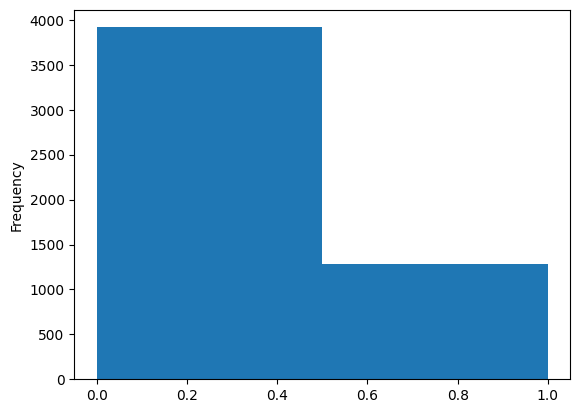

In [35]:
for feature in df.columns:
    fig = plt.figure()
    df[feature].plot(kind="hist",bins=min(50,len(df[feature].unique())))
    fig.show()

1

check for empty values

In [20]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
white                   0
red                     0
dtype: int64

delete outliners

In [36]:
# for feature in df.columns:
#     q_low = df[feature].quantile(0.01)
#     q_hi  = df[feature].quantile(0.99)

#     df_filtered = df[(df[feature] < q_hi) & (df[feature] > q_low)]

normalization

In [37]:
# for feature in df.columns[:-3]:
#     df[feature] = zscore(df[feature])

In [38]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
white                   0
red                     0
dtype: int64

2

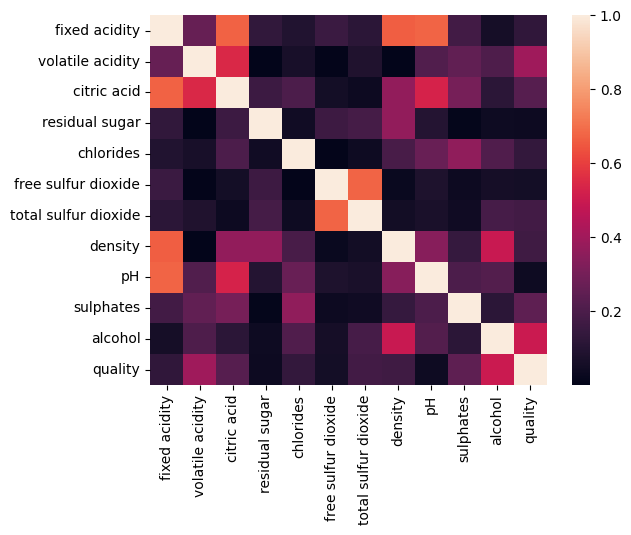

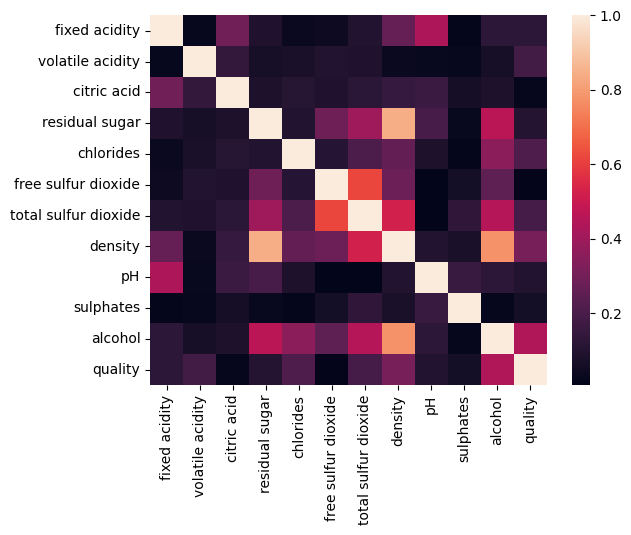

In [39]:
t = df.loc[df['red'] == 1]
t= t[list(df.columns[:-3])+list([df.columns[-3]])]
sns.heatmap(abs(t.corr()))
plt.show()
t = df.loc[df['white'] == 1]
t= t[list(df.columns[:-3])+list([df.columns[-3]])]
sns.heatmap(abs(t.corr()))
plt.show()

In [40]:
t = abs(df.corr()['quality']).sort_values().to_frame()[:-1][::-1]

In [41]:
t

,quality
alcohol,0.452931
density,0.308514
volatile acidity,0.264949
chlorides,0.207027
red,0.124642
white,0.124642
fixed acidity,0.084610
citric acid,0.077988
total sulfur dioxide,0.043613
free sulfur dioxide,0.041950


In [42]:
t.values

array([[0.45293136],
       [0.30851351],
       [0.26494861],
       [0.20702723],
       [0.12464193],
       [0.12464193],
       [0.08460993],
       [0.07798819],
       [0.04361291],
       [0.04195013],
       [0.03687058],
       [0.03685433],
       [0.0221941 ]])

In [43]:
t.index.to_list()

['alcohol',
 'density',
 'volatile acidity',
 'chlorides',
 'red',
 'white',
 'fixed acidity',
 'citric acid',
 'total sulfur dioxide',
 'free sulfur dioxide',
 'sulphates',
 'residual sugar',
 'pH']

In [44]:
t[t.columns[0]]

alcohol                 0.452931
density                 0.308514
volatile acidity        0.264949
chlorides               0.207027
red                     0.124642
white                   0.124642
fixed acidity           0.084610
citric acid             0.077988
total sulfur dioxide    0.043613
free sulfur dioxide     0.041950
sulphates               0.036871
residual sugar          0.036854
pH                      0.022194
Name: quality, dtype: float64

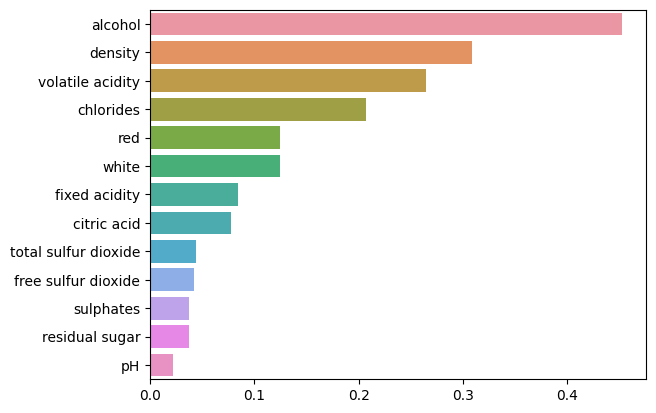

In [45]:
sns.barplot(x = t.values[:,0],y = list(t.index))
plt.show()

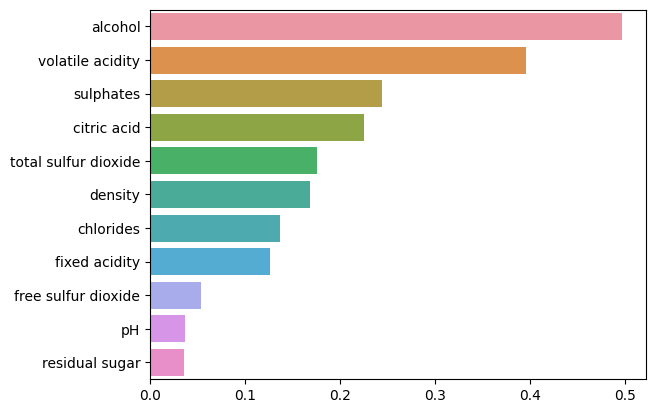

In [46]:
t = df.columns.to_list()
t.remove('red')
t.remove('white')
t = abs((df.loc[df['red']==1][t]).corr()['quality']).sort_values().to_frame()[:-1][::-1]
sns.barplot(x = t.values[:,0],y = list(t.index))
plt.show()

In [47]:
t

,quality
alcohol,0.497745
volatile acidity,0.396167
sulphates,0.244217
citric acid,0.225020
total sulfur dioxide,0.175736
density,0.168054
chlorides,0.137006
fixed acidity,0.126378
free sulfur dioxide,0.053529
pH,0.036967


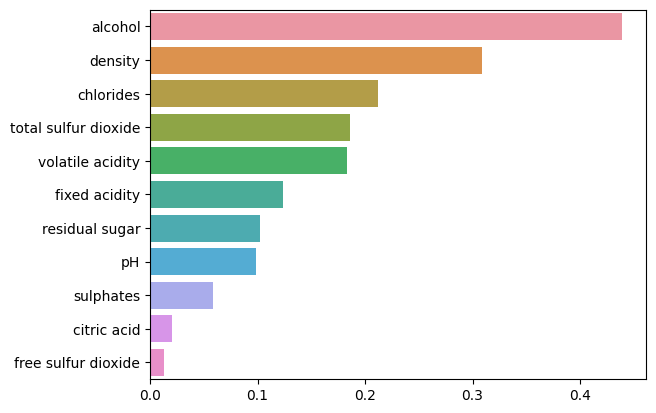

In [48]:
t = df.columns.to_list()
t.remove('red')
t.remove('white')
t = abs((df.loc[df['white']==1][t]).corr()['quality']).sort_values().to_frame()[:-1][::-1]
sns.barplot(x = t.values[:,0],y = list(t.index))
plt.show()

In [49]:
print((df.loc[df.red == 1]['quality']).mean())
print((df.loc[df.white == 1]['quality']).mean())



5.629397967161845
5.8797856049004595


In [50]:
sns.histplot

<function seaborn.distributions.histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)>

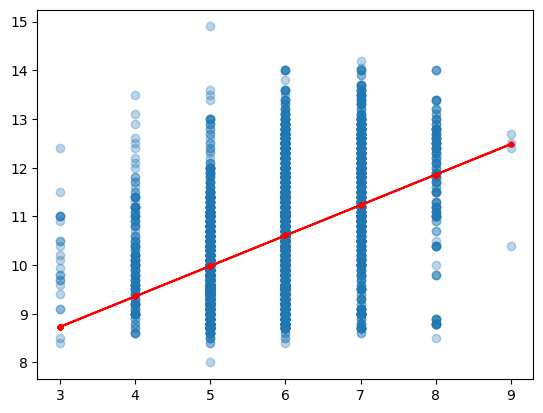

In [51]:

x = df['quality']
y = df['alcohol']
coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef)
plt.figure()
plt.scatter(x,y,alpha = 0.3)
plt.plot(x,poly1d_fn(x),'.-r')


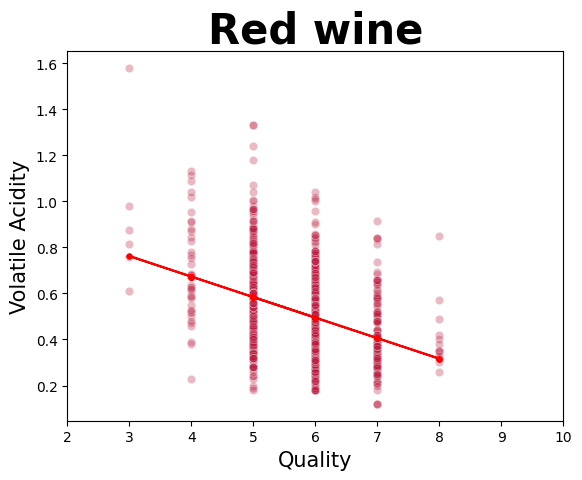

In [52]:
t = df.loc[df['red']==1]
x = t['quality']
y = t['volatile acidity']
coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef)
plt.figure()
p = sns.scatterplot(x =x,y = y,color = '#bc1b3e',alpha = 0.3)
p.set_title('Red wine', fontdict={'size': 30, 'weight': 'bold'})
p.set_xlabel('Quality', fontdict={'size': 15})
p.set_ylabel('Volatile Acidity', fontdict={'size': 15})

p.set_xlim([2, 10])
#p.set_ylim([7.5, 15])
plt.plot(x,poly1d_fn(x),'.-r')

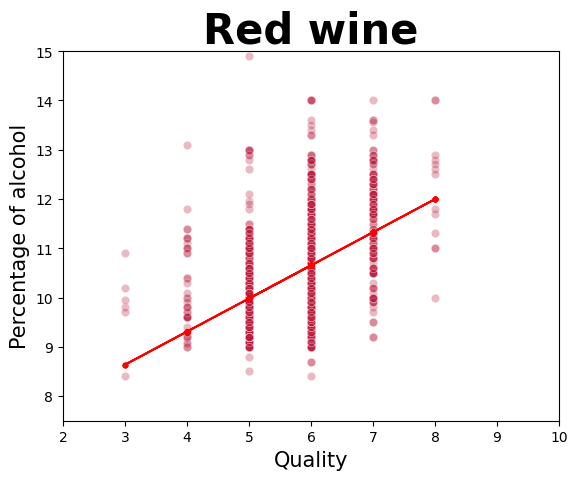

In [53]:
t = df.loc[df['red']==1]
x = t['quality']
y = t['alcohol']
coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef)
plt.figure()
p = sns.scatterplot(x =x,y = y,color = '#bc1b3e',alpha = 0.3)
p.set_title('Red wine', fontdict={'size': 30, 'weight': 'bold'})
p.set_xlabel('Quality', fontdict={'size': 15})
p.set_ylabel('Percentage of alcohol', fontdict={'size': 15})

p.set_xlim([2, 10])
p.set_ylim([7.5, 15])
plt.plot(x,poly1d_fn(x),'.-r')


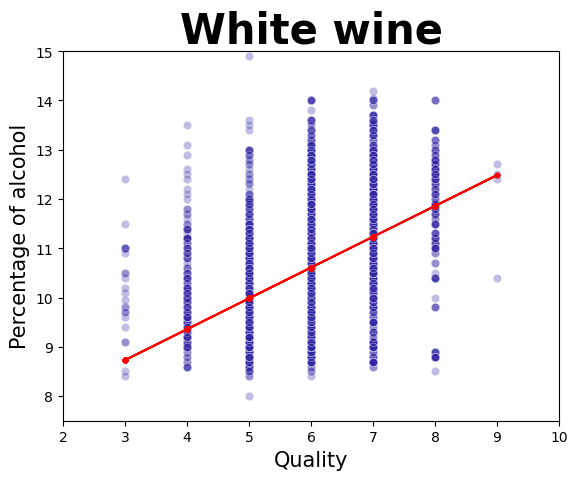

In [54]:
t = df.loc[df['white']==1]
x = df['quality']
y = df['alcohol']
coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef)
plt.figure()
p = sns.scatterplot(x = x,y = y,color = '#3025a3',alpha = 0.3)
p.set_title('White wine', fontdict={'size': 30, 'weight': 'bold'})
p.set_xlabel('Quality', fontdict={'size': 15})
p.set_ylabel('Percentage of alcohol', fontdict={'size': 15})

p.set_xlim([2, 10])
p.set_ylim([7.5, 15])
plt.plot(x,poly1d_fn(x),'.-r')


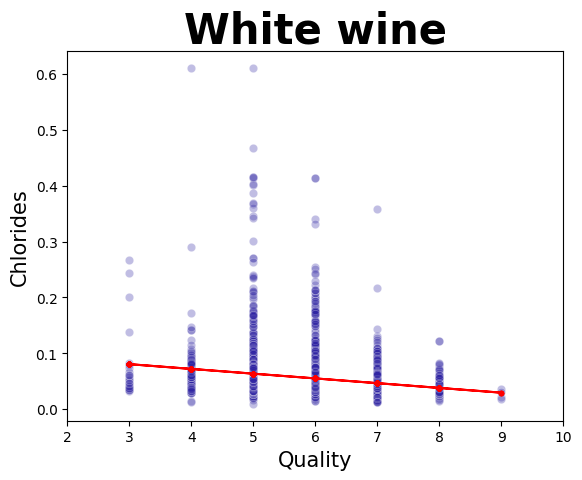

In [55]:
t = df.loc[df['white']==1]
x = df['quality']
y = df['chlorides']
coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef)
plt.figure()
p = sns.scatterplot(x = x,y = y,color = '#3025a3',alpha = 0.3)
p.set_title('White wine', fontdict={'size': 30, 'weight': 'bold'})
p.set_xlabel('Quality', fontdict={'size': 15})
p.set_ylabel('Chlorides', fontdict={'size': 15})

p.set_xlim([2, 10])
#p.set_ylim([0.98, 1.01])
plt.plot(x,poly1d_fn(x),'.-r')

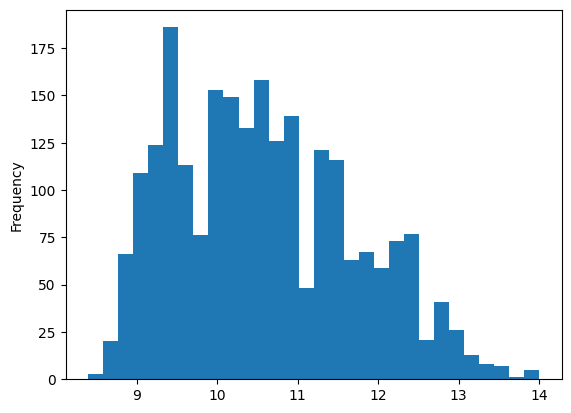

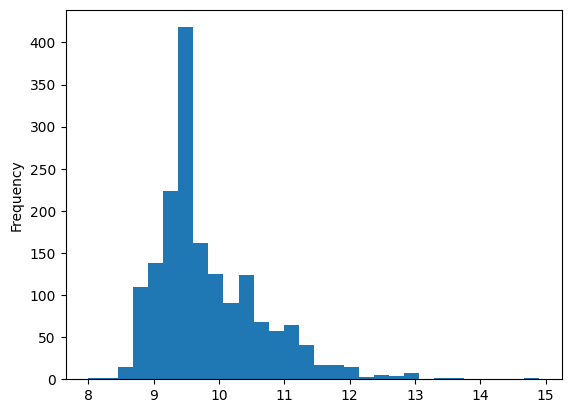

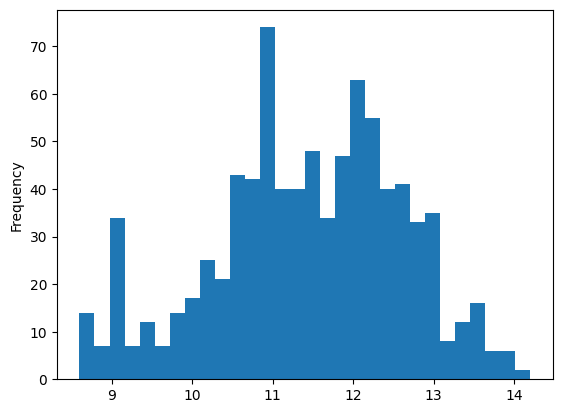

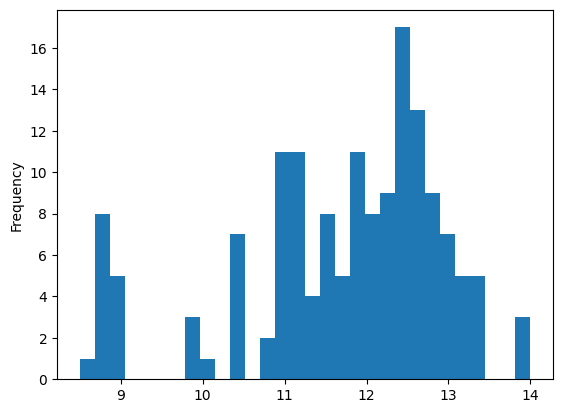

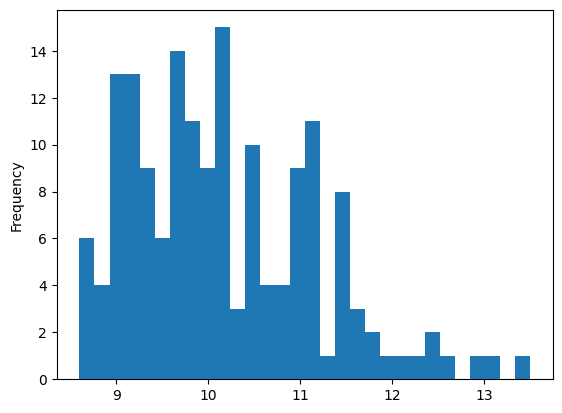

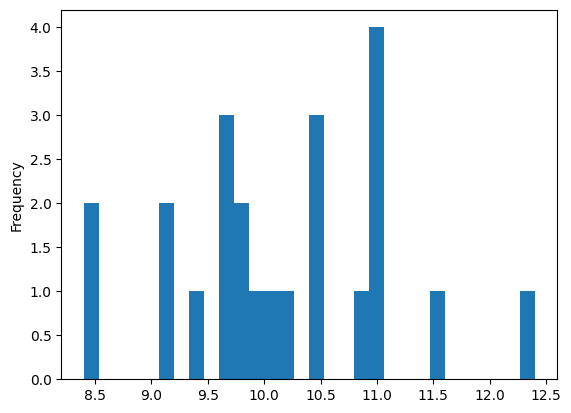

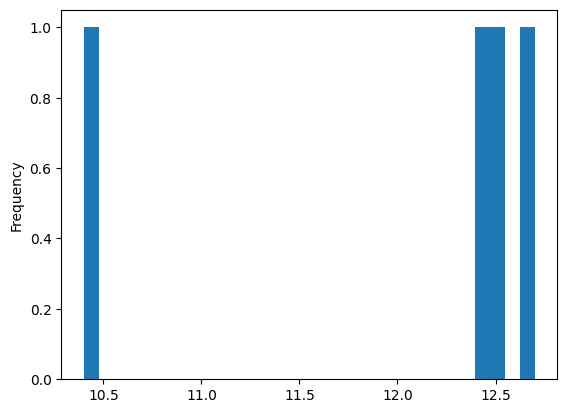

In [56]:
for quality in df['quality'].unique():
    fig = plt.figure()
    df.loc[df['quality']==quality]['alcohol'].plot(kind="hist",bins=30)



3

In [57]:
important_values = (df.corr()['quality'].loc[abs(df.corr()['quality'])>=0.05].index.to_list())
important_values.remove('quality')

In [58]:
X = df[important_values].to_numpy()
y = df['quality'].to_numpy()

In [59]:
print(X.shape)

(5197, 8)


In [60]:
y

array([6, 6, 6, ..., 6, 6, 6])

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#LR

In [62]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [63]:
mean_squared_error(model_lr.predict(X_test),y_test)

0.5800956669529213

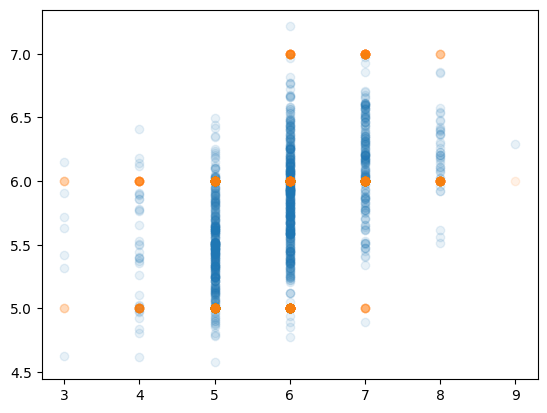

In [64]:
plt.figure()
plt.scatter(y_test,model_lr.predict(X_test),alpha = 0.1)
plt.scatter(y_test,list(map(round,model_lr.predict(X_test))),alpha = 0.1)

In [65]:
model_rfr = RandomForestRegressor(n_estimators = 200)
model_rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [66]:
print(mean_squared_error(model_rfr.predict(X_test),y_test))
print(mean_squared_error(list(map(round,model_rfr.predict(X_test))),y_test))

0.4369466826923077
0.4980769230769231


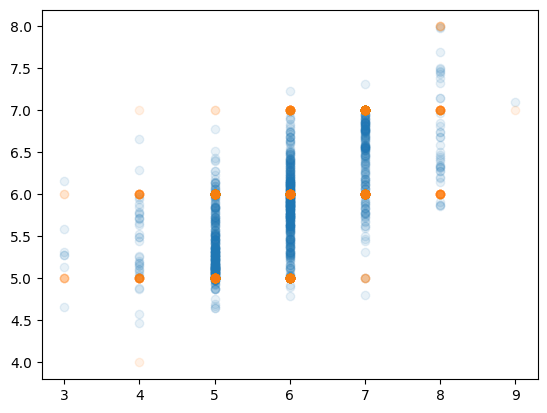

In [67]:
plt.figure()
plt.scatter(y_test,model_rfr.predict(X_test),alpha = 0.1)
plt.scatter(y_test,list(map(round,model_rfr.predict(X_test))),alpha = 0.1)

(array([ 76., 338., 380., 189.,  49.,   8.]),
 array([4.475     , 5.06166667, 5.64833333, 6.235     , 6.82166667,
        7.40833333, 7.995     ]),
 <BarContainer object of 6 artists>)

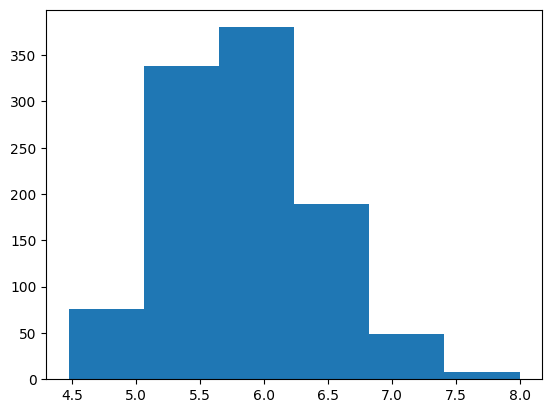

In [68]:
plt.hist(model_rfr.predict(X_test),bins=6)

(array([  7.,  34., 345., 435., 179.,  40.]),
 array([3., 4., 5., 6., 7., 8., 9.]),
 <BarContainer object of 6 artists>)

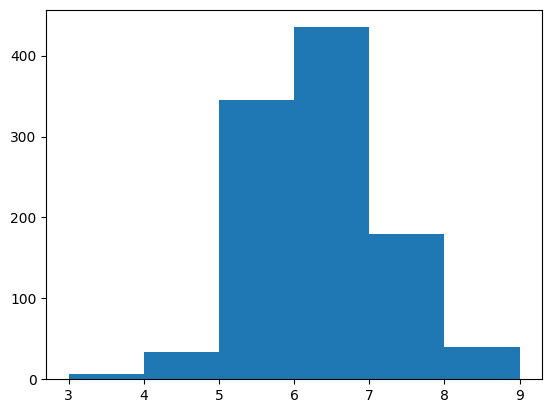

In [69]:
plt.hist(y_test,bins=6)

#DTR

In [70]:
model_dtr = DecisionTreeRegressor(random_state = 42)
model_dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [71]:
print(mean_squared_error(model_dtr.predict(X_test),y_test))

0.7528846153846154


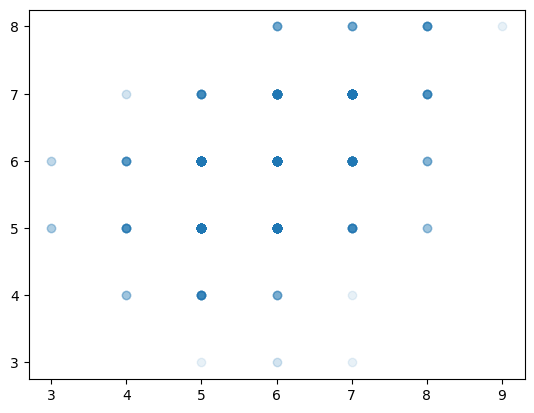

In [72]:
plt.figure()
plt.scatter(y_test,model_dtr.predict(X_test),alpha = 0.1)